* Dataset from : https://www.kaggle.com/gobert/bank-telemarketing-moro-et-al
* Bank Telemarketing 
* Predict success of bank telemarketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

import sklearn.model_selection as ms 
import sklearn.linear_model as lm
import sklearn.ensemble as ens
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import sklearn.metrics as met
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE


### Load Dataset

In [2]:
data = pd.read_csv(r"I:\My Prof\Digital School\RE Dataset Project\bank-additional.csv")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


#### Data Exploration

In [3]:
data.shape

(4119, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
data.describe(include= "object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


In [7]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4114    False
4115    False
4116    False
4117    False
4118    False
Length: 4119, dtype: bool

### Data Visualization

#### Based on Client Data

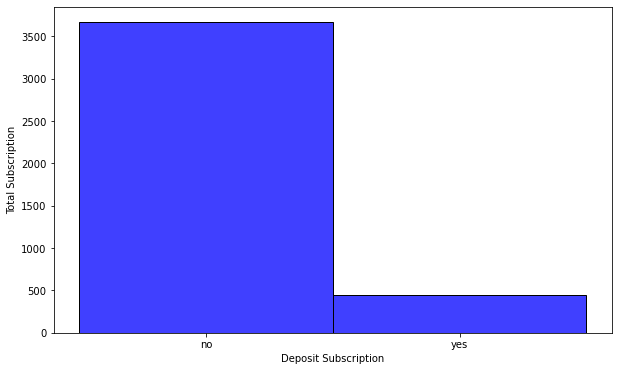

In [9]:
plt.figure(figsize = (10, 6))
sns.histplot(x = data['y'], color = "blue", edgecolor = "black")
plt.xlabel('Deposit Subscription')
plt.ylabel('Total Subscription')
plt.show()

Dari histogram diatas, diketahui bahwa terdapat sekitar 3668 dari 4119 atau sekitar 89% dari data client menyatakan bahwa client tidak melakukan registrasi atau berlangganan layanan deposito, dan sekitar 451 dari 4119 atau hanya sekitar 11% dari data client menyatakan bahwa client melakukan berlangganan layanan deposito. 

In [10]:
ktg_age = data.groupby(['age', 'y'], as_index = False)['y'].count() 
# yang atas merupakan No, yang bawah merupakan Yes
ktg_age

,age,y
0,18,2
1,18,1
2,19,1
3,20,4
4,21,4
...,...,...
119,81,2
120,82,2
121,85,1
122,86,2


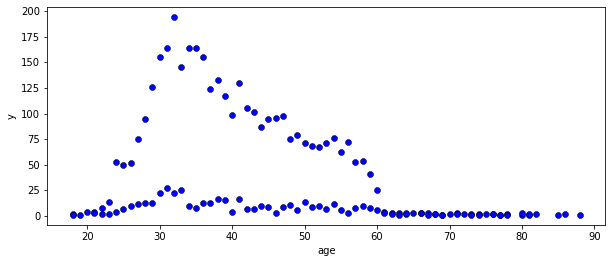

In [11]:
plt.figure(figsize = (10, 4))
sns.scatterplot(x = ktg_age['age'], y = ktg_age['y'], color = "blue", edgecolor = "black")
plt.show()

In [12]:
ktg_job = data.groupby(['job', 'y'], as_index = False)['y'].count() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_job

,job,y
0,admin.,879
1,admin.,133
2,blue-collar,823
3,blue-collar,61
4,entrepreneur,140
5,entrepreneur,8
6,housemaid,99
7,housemaid,11
8,management,294
9,management,30


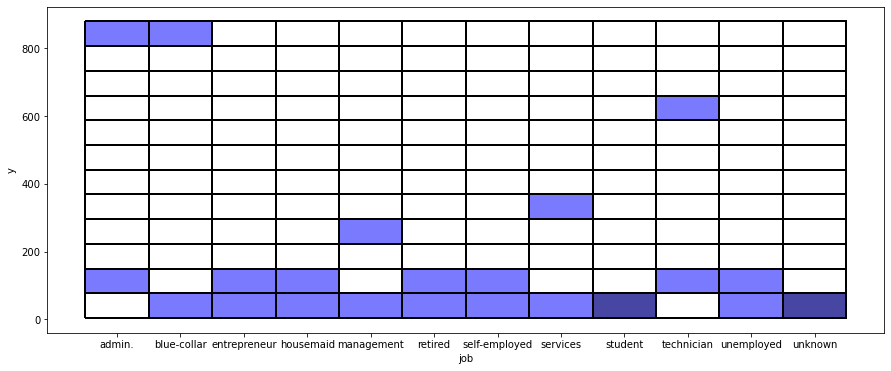

In [13]:
plt.figure(figsize = (15, 6))


sns.histplot(x = ktg_job['job'], y = ktg_job['y'], color = "blue", edgecolor = "black")
plt.show()

In [14]:
ktg_marital = data.groupby(['marital', 'y'], as_index = False)['y'].count() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_marital

,marital,y
0,divorced,403
1,divorced,43
2,married,2257
3,married,252
4,single,998
5,single,155
6,unknown,10
7,unknown,1


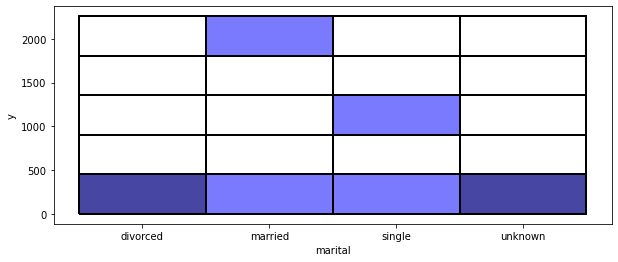

In [15]:
plt.figure(figsize = (10, 4))
sns.histplot(x = ktg_marital['marital'], y = ktg_marital['y'], color = "blue", edgecolor = "black")
plt.show()

In [16]:
ktg_edu = data.groupby(['education', 'y'], as_index = False)['y'].count() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_edu

,education,y
0,basic.4y,391
1,basic.4y,38
2,basic.6y,211
3,basic.6y,17
4,basic.9y,531
5,basic.9y,43
6,high.school,824
7,high.school,97
8,illiterate,1
9,professional.course,470


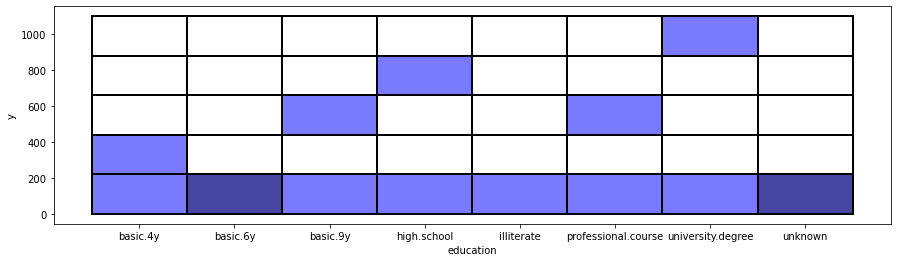

In [17]:
plt.figure(figsize = (15, 4))
sns.histplot(x = ktg_edu['education'], y = ktg_edu['y'], color = "blue", edgecolor = "black")
plt.show()

In [18]:
ktg_def = data.groupby(['default', 'y'], as_index = False)['y'].count() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_def

,default,y
0,no,2913
1,no,402
2,unknown,754
3,unknown,49
4,yes,1


In [19]:
ktg_house = data.groupby(['housing', 'y'], as_index = False)['y'].count() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_house

,housing,y
0,no,1637
1,no,202
2,unknown,96
3,unknown,9
4,yes,1935
5,yes,240


In [20]:
ktg_loan = data.groupby(['loan', 'y'], as_index = False)['y'].count() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_loan

,loan,y
0,no,2975
1,no,374
2,unknown,96
3,unknown,9
4,yes,597
5,yes,68


#### Based on Related with the last contact of the current campaign

In [21]:
ktg_contact = data.groupby(['contact', 'y'], as_index = False)['y'].count() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_contact

,contact,y
0,cellular,2277
1,cellular,375
2,telephone,1391
3,telephone,76


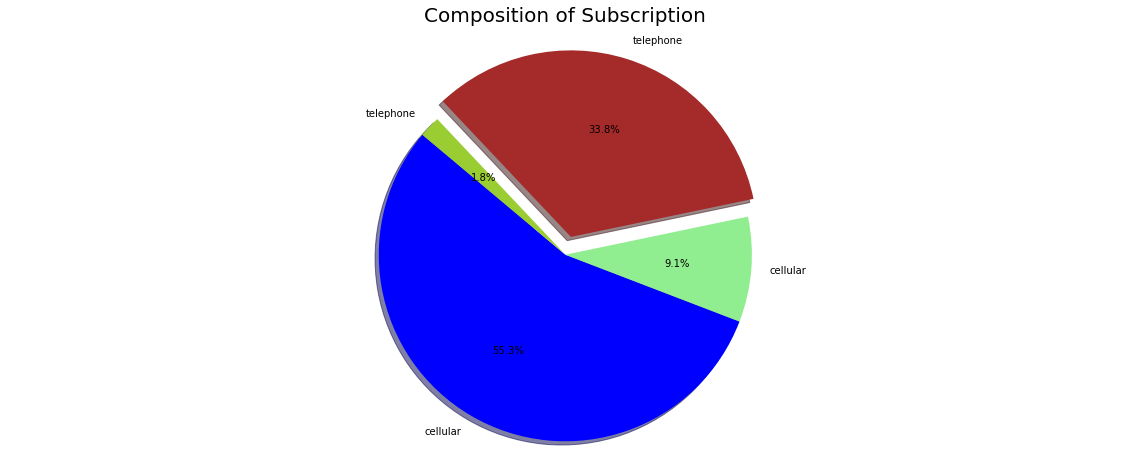

In [22]:
labels = ktg_contact['contact']
sizes = ktg_contact['y']
colors = ['blue', 'lightgreen', 'brown', 'yellowgreen']
explode = (0, 0, 0.1, 0)

plt.figure(figsize = (20, 8))
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 140)

plt.title ('Composition of Subscription', fontsize = 20)
plt.axis ('equal')
plt.show()



Berdasarkan Gambar diatas, terlihat bahwa porsi dari jenis komunikasi menggunakan celuler menjadi bagian terbesar dalam komunikasi dimana hasil dari campaign mendekati nilai 0, yang berarti bahwa client tidak melakukan langganan deposito. Hal ini juga dilihat dari jumlah kontak yang hubungi oleh bank sangat banyak pada satu hingga tiga kali menghubungi menghasilkan nilai 0. Penting untuk mencoba metode lain selain dari menggunakan celuler, dikarenakan tingkat tidak respon client sangat tinggi. 

In [23]:
ktg_month = data.groupby(['month', 'y'], as_index = False)['y'].count() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_month
#ktg_month.sort_values(by='y', ascending = True)

,month,y
0,apr,179
1,apr,36
2,aug,572
3,aug,64
4,dec,10
5,dec,12
6,jul,652
7,jul,59
8,jun,462
9,jun,68


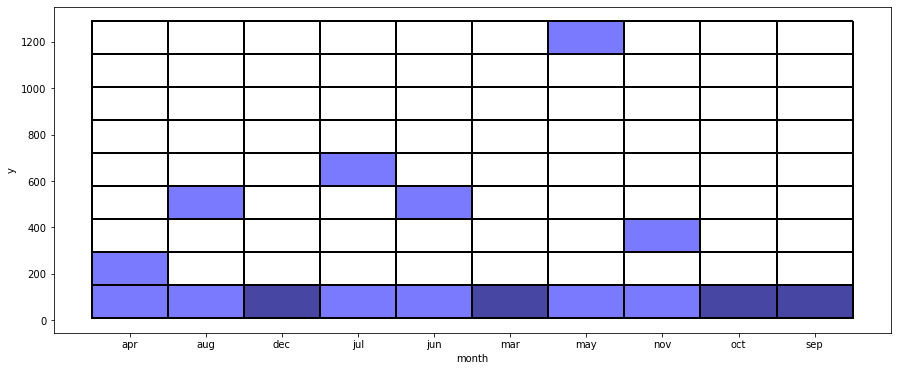

In [24]:
plt.figure(figsize = (15, 6))
sns.histplot(x = ktg_month['month'], y = ktg_month['y'], color = "blue", edgecolor = "black")
plt.show()

In [25]:
ktg_week = data.groupby(['day_of_week', 'y'], as_index = False)['y'].count() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_week

,day_of_week,y
0,fri,685
1,fri,83
2,mon,757
3,mon,98
4,thu,764
5,thu,96
6,tue,750
7,tue,91
8,wed,712
9,wed,83


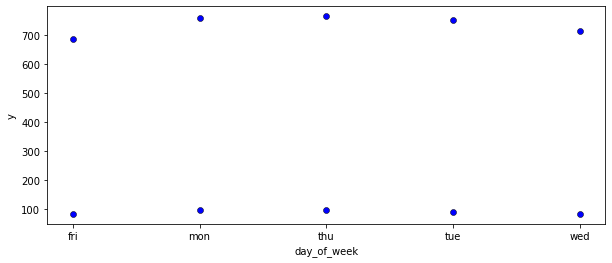

In [26]:
plt.figure(figsize = (10, 4))
sns.scatterplot(x = ktg_week['day_of_week'], y = ktg_week['y'], color = "blue", edgecolor = "black")
plt.show()

In [27]:
ktg_dur = data.groupby(['duration', 'y'], as_index = False)['y'].count() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_dur

,duration,y
0,0,1
1,4,1
2,5,4
3,6,5
4,7,4
...,...,...
1057,1980,1
1058,2301,1
1059,2653,1
1060,3253,1


#### Based on Other Attributes

In [28]:
ktg_campaign = data.groupby(['campaign', 'y'], as_index = False)['y'].count() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_campaign

,campaign,y
0,1,1545
1,1,219
2,2,920
3,2,119
4,3,487
5,3,62
6,4,259
7,4,32
8,5,133
9,5,9


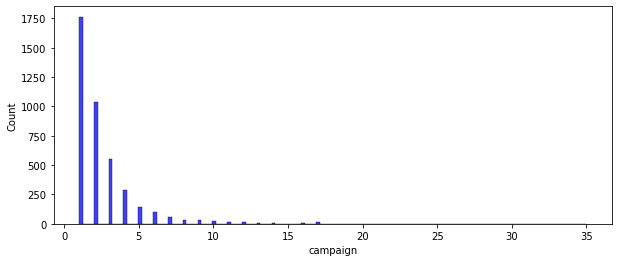

In [29]:
plt.figure(figsize = (10, 4))
sns.histplot(x = data['campaign'], color = "blue", edgecolor = "black")
plt.show()

In [30]:
ktg_days = data.groupby(['pdays', 'y'], as_index = False)['y'].count() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_days

,pdays,y
0,0,2
1,1,3
2,2,3
3,2,1
4,3,13
5,3,39
6,4,9
7,4,5
8,5,4
9,6,15


In [31]:
ktg_previous = data.groupby(['previous', 'y'], as_index = False)['y'].count() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_previous

,previous,y
0,0,3231
1,0,292
2,1,376
3,1,99
4,2,46
5,2,32
6,3,10
7,3,15
8,4,4
9,4,10


In [32]:
ktg_pout = data.groupby(['poutcome', 'y'], as_index = False)['y'].count() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_pout

,poutcome,y
0,failure,387
1,failure,67
2,nonexistent,3231
3,nonexistent,292
4,success,50
5,success,92


#### Based on context Social and Economy

In [33]:
ktg_emp = data.groupby(['y'], as_index = False)['emp.var.rate'].sum() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_emp

,y,emp.var.rate
0,no,881.0
1,yes,-531.0


In [34]:
ktg_price = data.groupby(['y'], as_index = False)['cons.price.idx'].sum() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_price

,y,cons.price.idx
0,no,343323.614
1,yes,42131.188


In [35]:
ktg_conf = data.groupby(['y'], as_index = False)['cons.conf.idx'].sum() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_conf

,y,cons.conf.idx
0,no,-148872.1
1,yes,-17943.7


In [36]:
ktg_euribor = data.groupby(['y'], as_index = False)['euribor3m'].sum() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_euribor

,y,euribor3m
0,no,13948.767
1,yes,967.597


In [37]:
ktg_employe = data.groupby(['y'], as_index = False)['nr.employed'].sum() 
#yang atas merupakan No, kemudian yang bawah merupakan Yes
ktg_employe

,y,nr.employed
0,no,18983741.6
1,yes,2296996.5


#### Based on Attribute with attribute maybe can be effect to class label

In [38]:
data['minute'] = data['duration'].apply(lambda x : x/60).round(2)
data['minute']

0       8.12
1       5.77
2       3.78
3       0.28
4       0.97
        ... 
4114    0.88
4115    3.65
4116    1.07
4117    8.80
4118    2.92
Name: minute, Length: 4119, dtype: float64

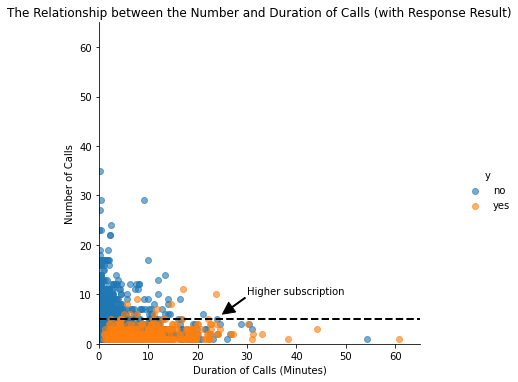

In [39]:
dur_cam = sns.lmplot(x='minute', y='campaign',data = data,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =5)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription',xytext = (30,10),
             arrowprops=dict(color = 'k', width=1),xy=(25,6))
plt.show()

Dalam scatter plot ini, nasabah yang berlangganan deposito berjangka dilambangkan dengan "ya" sedangkan yang tidak berlangganan dilambangkan sebagai "tidak".

Seperti yang dapat kita lihat dari plot, klien “ya” dan klien “tidak” membentuk dua kelompok yang relatif terpisah. Dibandingkan dengan klien “tidak”, klien “ya” dihubungi lebih sedikit dan memiliki durasi panggilan yang lebih lama. Lebih penting lagi, setelah lima panggilan kampanye, klien cenderung menolak deposito berjangka kecuali durasinya tinggi. Kebanyakan klien “ya” didekati kurang dari 10 kali.

Hal ini menunjukkan bahwa bank harus menolak menelepon klien lebih dari lima kali, yang dapat mengganggu dan meningkatkan ketidakpuasan.

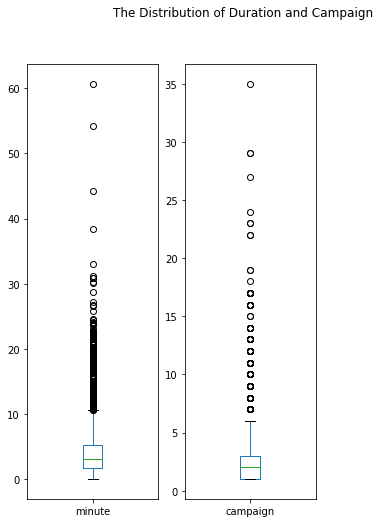

In [40]:
distribusi = data[['minute','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,3),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

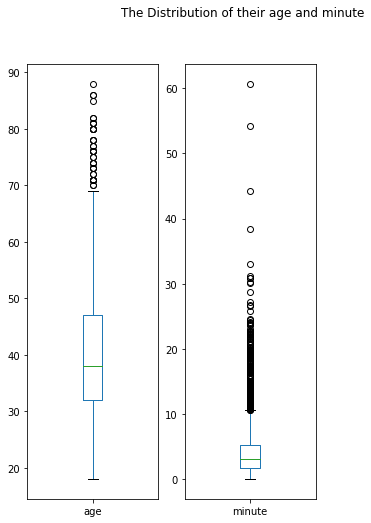

In [41]:
data_age = data[['age','minute']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,3),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of their age and minute')
plt.show()

Text(0.5, 1.0, 'age vs minute')

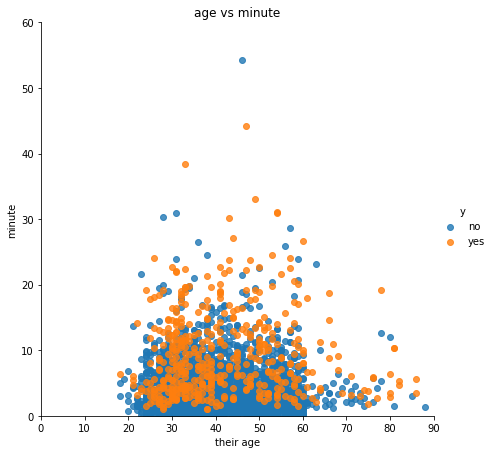

In [42]:
age_camp = sns.lmplot(x='age', y='minute',data = data,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.8}, height = 6)

plt.axis([0,90,0,60])
plt.ylabel('minute')
plt.xlabel('their age')
plt.title('age vs minute')




Text(0.5, 1.0, 'days vs minute')

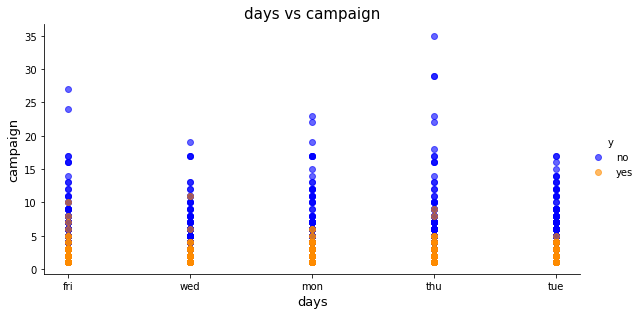

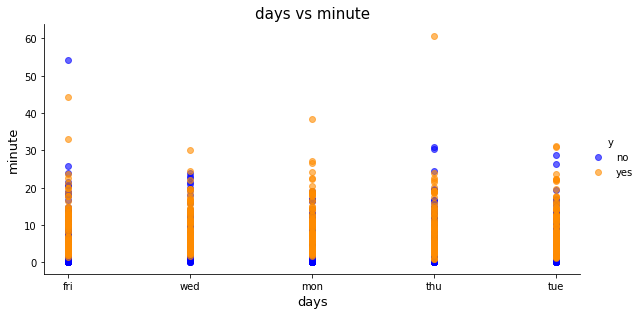

In [43]:
day_campg = sns.lmplot(x='day_of_week', y='campaign',data = data,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height = 4 , aspect = 2.0, 
                     markers = ['o', 'o'], palette = dict(yes='darkorange', no='blue'))

plt.ylabel('campaign', size = 13)
plt.xlabel('days', size = 13)
plt.title('days vs campaign', size = 15)

day_campg = sns.lmplot(x='day_of_week', y='minute',data = data,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height = 4, aspect = 2.0, 
                     markers = ['o', 'o'], palette = dict(yes='darkorange', no='blue'))

plt.ylabel('minute', size = 13)
plt.xlabel('days', size = 13)
plt.title('days vs minute', size = 15)

In [44]:
day_cam = data.groupby(['day_of_week','campaign', 'y'])['y'].count()
day_min = data.groupby(['day_of_week', 'minute', 'y' ])['y'].count()
day_cam


day_of_week  campaign  y  
fri          1         no     258
                       yes     33
             2         no     191
                       yes     23
             3         no      94
                             ... 
wed          11        yes      1
             12        no       2
             13        no       2
             17        no       3
             19        no       1
Name: y, Length: 123, dtype: int64

In [45]:
job_response = pd.crosstab(data['y'],data['job']).apply(lambda x: x/(x.count()))
job_response = job_response.transpose()

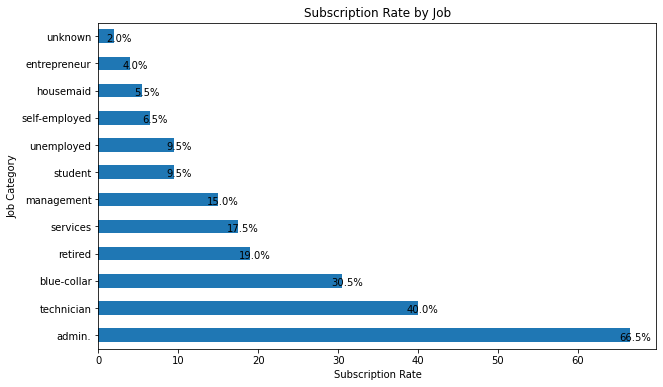

In [46]:
plot_job = job_response['yes'].sort_values(ascending = False).plot(kind ='barh',
                                                                           figsize = (10,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      job_response['yes'].sort_values(ascending = False).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.6, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

Sebagaimana dicatat dari diagram batang horizontal, klien admin dan teknisi menyumbang lebih dari 50% langganan, yang mana memungkinkan untuk meningkatkan telemarketing pada job-job tersebut. 


In [47]:
agg_tips = data.groupby(['job', 'y'])['y'].count().unstack()
agg_tips

y,no,yes
job,,
admin.,879,133
blue-collar,823,61
entrepreneur,140,8
housemaid,99,11
management,294,30
retired,128,38
self-employed,146,13
services,358,35
student,63,19


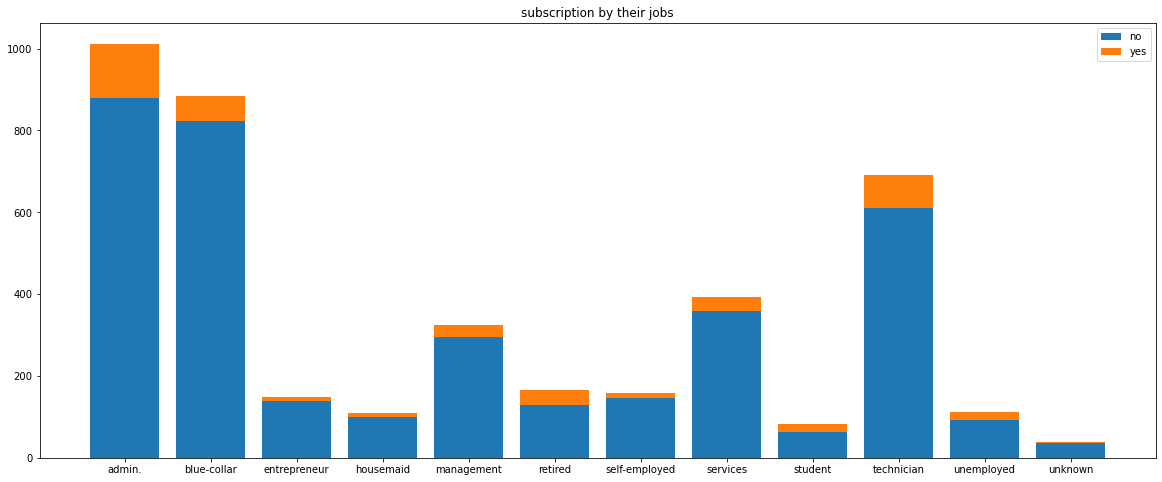

In [48]:
plt.figure (figsize = (20, 8))
plt.bar(agg_tips.index, agg_tips['no'], label='no')
plt.bar(agg_tips.index, agg_tips['yes'], bottom=agg_tips['no'],
       label='yes')
plt.title('subscription by their jobs')
plt.legend()
plt.show()

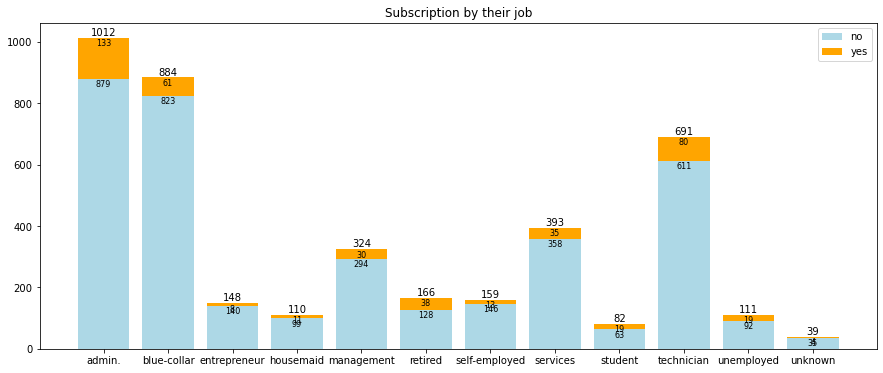

In [49]:
fig, ax = plt.subplots(figsize = (15,6))

colors = ['lightblue', 'orange']
bottom = np.zeros(len(agg_tips))

for i, col in enumerate(agg_tips.columns):
    ax.bar(
      agg_tips.index, agg_tips[col], bottom=bottom, label=col, color=colors[i])
    bottom += np.array(agg_tips[col])

totals = agg_tips.sum(axis=1)
y_offset = 8
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          )

# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -25
# For each patch (basically each rectangle within the bar), add a label.
for bar in ax.patches:
    ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='black',
      #weight='bold',
      size=8
  )

ax.set_title('Subscription by their job')
ax.legend()


In [50]:
group_3 = data.groupby(['job', 'age', 'y'])['y'].count()
group_3


job      age  y  
admin.   22   yes     1
         23   no      4
         24   no      8
              yes     1
         25   no     17
                     ..
unknown  60   no      1
         61   no      1
         64   no      1
              yes     1
         66   no      1
Name: y, Length: 621, dtype: int64

Text(0.5, 1.0, 'job and their age by subscription')

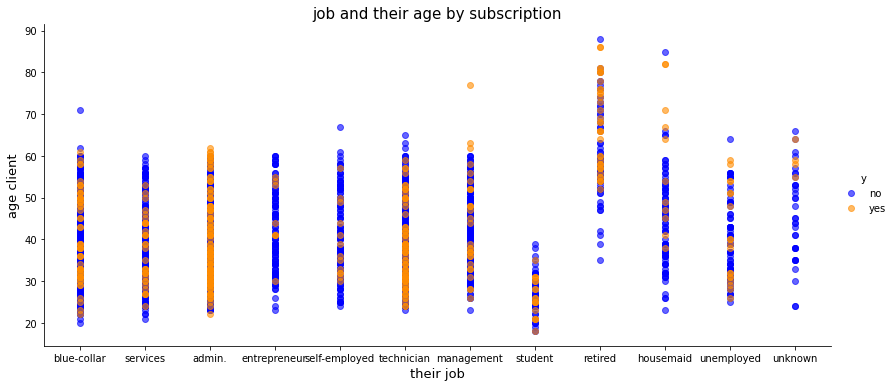

In [51]:
group_3 = sns.lmplot(x='job', y='age',data = data,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height = 5, aspect = 2.3, 
                     markers = ['o', 'o'], palette = dict(yes='darkorange', no='blue'))

plt.ylabel('age client', size = 13)
plt.xlabel('their job', size = 13)
plt.title('job and their age by subscription', size = 15)

In [52]:
aa = data[['job']]
bb = data[['minute']]
cc = data [['age']]
dd = data [['y']]
gr = pd.concat([aa, bb, cc, dd], axis = 1)
gr

,job,minute,age,y
0,blue-collar,8.12,30,no
1,services,5.77,39,no
2,services,3.78,25,no
3,services,0.28,38,no
4,admin.,0.97,47,no
...,...,...,...,...
4114,admin.,0.88,30,no
4115,admin.,3.65,39,no
4116,student,1.07,27,no
4117,admin.,8.80,58,no


In [53]:
group_5 = data.groupby(['minute','job', 'y'])['y'].count()
group_5

minute  job            y  
0.00    admin.         no     1
0.07    self-employed  no     1
0.08    admin.         no     1
        blue-collar    no     1
        self-employed  no     1
                             ..
33.00   blue-collar    yes    1
38.35   blue-collar    yes    1
44.22   admin.         yes    1
54.22   admin.         no     1
60.72   technician     yes    1
Name: y, Length: 2671, dtype: int64

Text(0.5, 1.0, 'number of call vs their job by subscription')

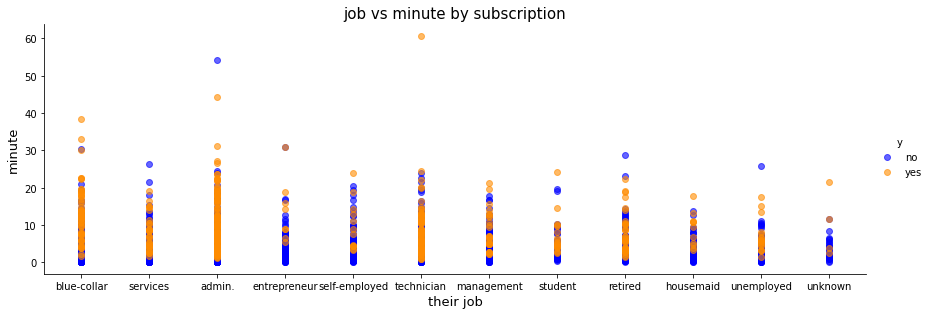

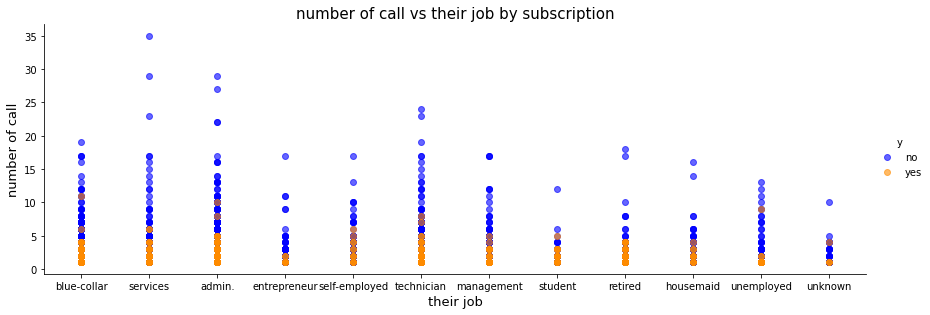

In [54]:
group_4 = sns.lmplot(x='job', y= 'minute', data = data,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height = 4, aspect = 3.0, 
                     markers = ['o', 'o'], palette = dict(yes='darkorange', no='blue'))
plt.ylabel('minute', size = 13)
plt.xlabel('their job',  size = 13)
plt.title('job vs minute by subscription', size = 15)
group_4 = sns.lmplot(x='job', y = 'campaign', data = data,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height = 4, aspect = 3.0, 
                     markers = ['o', 'o'], palette = dict(yes='darkorange', no='blue'))
plt.ylabel('number of call', size = 13)
plt.xlabel('their job',  size = 13)
plt.title('number of call vs their job by subscription', size = 15)

In [55]:
month_response= pd.crosstab(data['y'],data['month']).apply(lambda x: x/x.count())
month_response = month_response.transpose()

In [56]:
month = pd.DataFrame(data['month'].value_counts())
month['% Contacted'] = month['month']*1/month['month'].count()
month['% Subscription'] = month_response['yes']

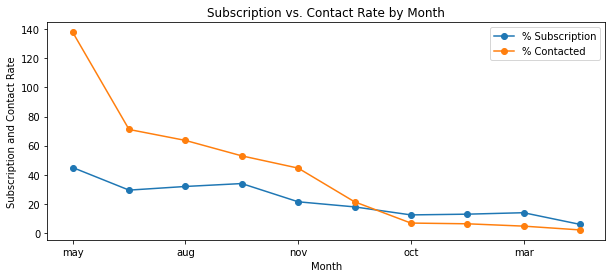

In [57]:
import numpy as np
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,4),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

plt.show()

Bagan garis ini menampilkan tingkat kontak bank di setiap bulan serta tingkat respons klien di setiap bulan. Salah satu cara untuk mengevaluasi efektivitas rencana pemasaran bank adalah dengan melihat apakah kedua lini tersebut memiliki tren yang sama dalam kurun waktu yang sama.

Bank menghubungi sebagian besar klien antara Mei dan Agustus. Tingkat kontak tertinggi sekitar 30% terjadi pada bulan Mei, sedangkan tingkat kontak mendekati 0 pada bulan Maret, September, Oktober, dan Desember.

Namun, tingkat berlangganan menunjukkan tren yang berbeda. Tingkat berlangganan tertinggi terjadi pada bulan Maret, yaitu lebih dari 50%, dan semua tingkat berlangganan pada bulan September, Oktober, dan Desember di atas 40%.

Jelas, kedua garis ini bergerak ke arah yang berbeda yang sangat menunjukkan waktu yang tidak tepat untuk kampanye pemasaran bank. Untuk meningkatkan kampanye pemasaran, bank harus mempertimbangkan untuk memulai kampanye pemasaran jarak jauh di musim gugur dan musim semi ketika tingkat berlangganan cenderung lebih tinggi.

Namun demikian, bank harus berhati-hati dalam menganalisis faktor eksternal. Lebih banyak data dari kampanye pemasaran sebelumnya harus dikumpulkan dan dianalisis untuk memastikan bahwa efek musiman ini konstan sepanjang waktu dan dapat diterapkan di masa mendatang.

Bank menghubungi sebagian besar klien antara Mei dan Agustus. Tingkat kontak tertinggi sekitar 30% terjadi pada bulan Mei, sedangkan tingkat kontak mendekati 0 pada bulan Maret dan Desember.

Namun, tingkat berlangganan menunjukkan tren yang berbeda. Tingkat berlangganan tertinggi terjadi pada bulan Maret dan Desember yaitu lebih dari 50%.

Jelas, kedua garis ini bergerak ke arah yang berbeda yang sangat menunjukkan waktu yang tidak tepat untuk kampanye pemasaran bank. Untuk meningkatkan kampanye pemasaran, bank harus mempertimbangkan untuk memulai kampanye telemarketing di sekitaran bulan tersebut karena tingkat berlangganan cenderung lebih tinggi.

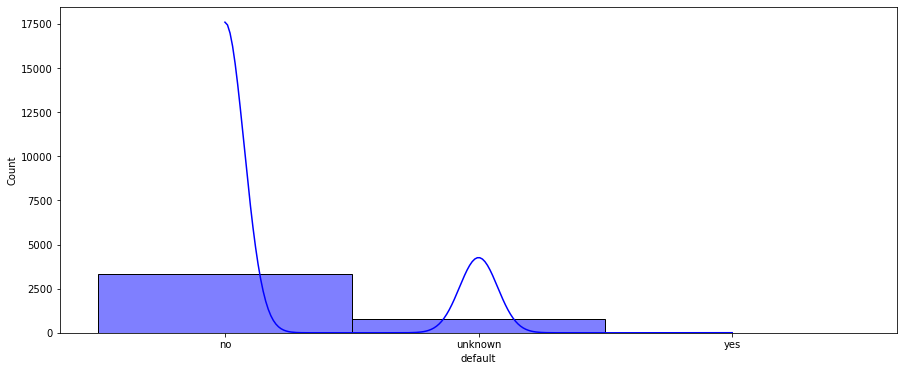

In [58]:
plt.figure(figsize = (15, 6))
sns.histplot(x = data['default'], color = "blue", edgecolor = "black", kde=True)
plt.show()

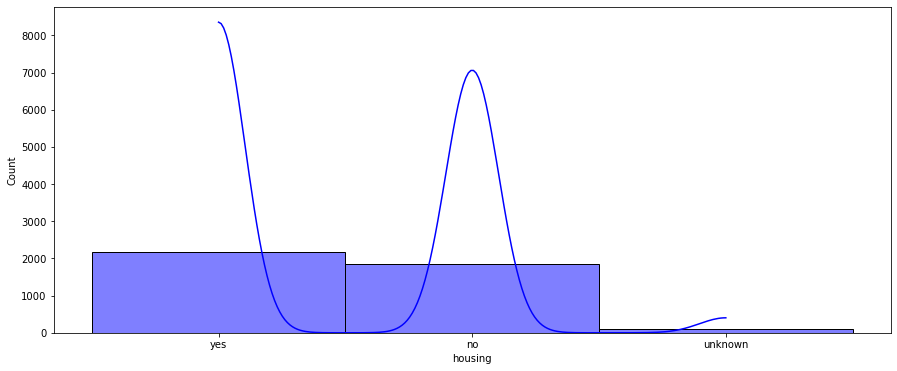

In [59]:
plt.figure(figsize = (15, 6))
sns.histplot(x = data['housing'], color = "blue", edgecolor = "black", kde=True)
plt.show()

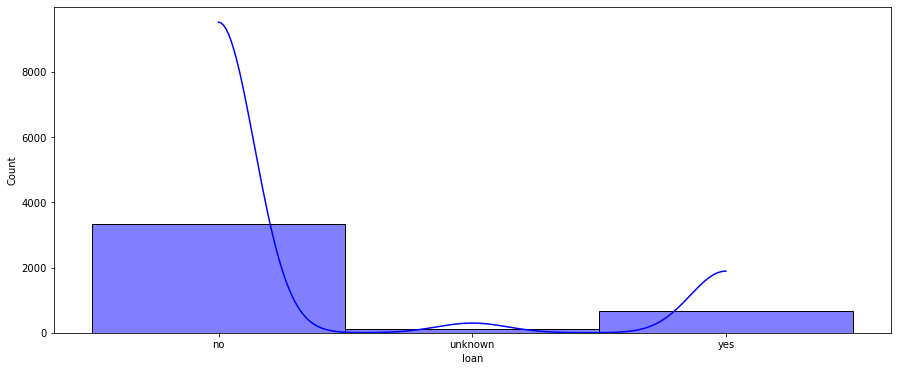

In [60]:
plt.figure(figsize = (15, 6))
sns.histplot(x = data['loan'], color = "blue", edgecolor = "black", kde=True)
plt.show()

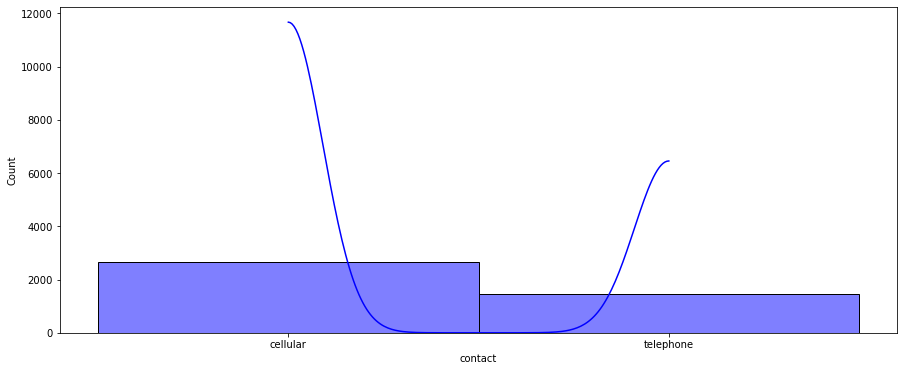

In [61]:
plt.figure(figsize = (15, 6))
sns.histplot(x = data['contact'], color = "blue", edgecolor = "black", kde=True)
plt.show()

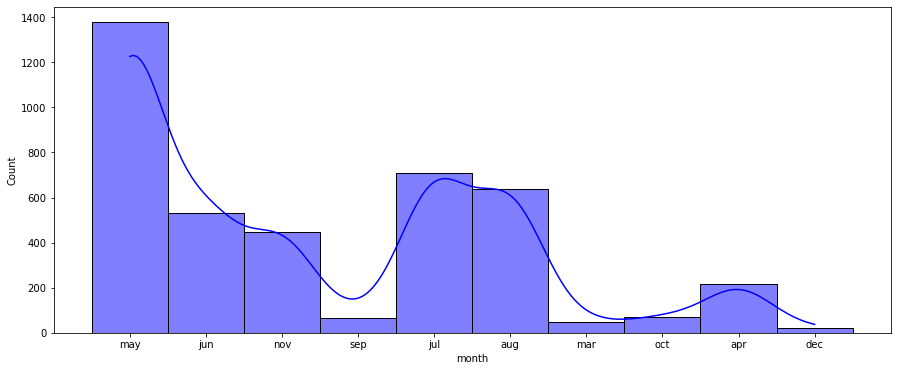

In [62]:
plt.figure(figsize = (15, 6))
sns.histplot(x = data['month'], color = "blue", edgecolor = "black", kde=True)
plt.show()

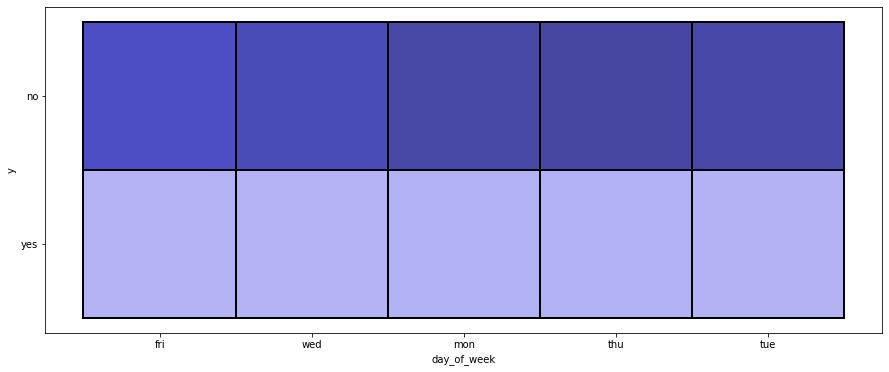

In [63]:
plt.figure(figsize = (15, 6))
sns.histplot(x = data['day_of_week'], y = data['y'], color = "blue", edgecolor = "black", kde=True)
plt.show()

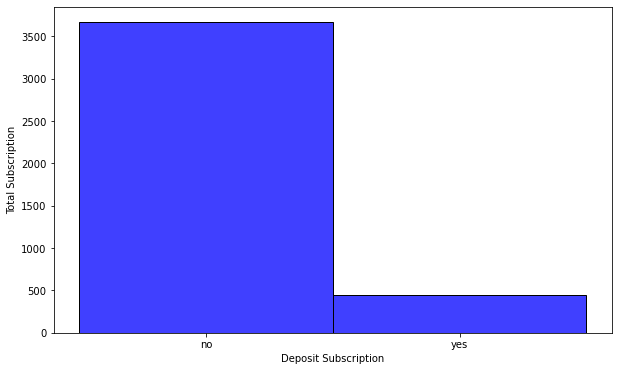

In [64]:
plt.figure(figsize = (10, 6))
sns.histplot(x = data['y'], color = "blue", edgecolor = "black")
plt.xlabel('Deposit Subscription')
plt.ylabel('Total Subscription')
plt.show()

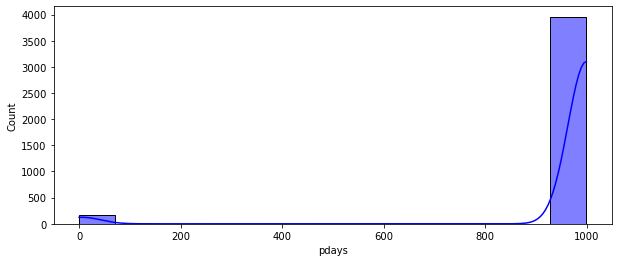

In [65]:
plt.figure(figsize = (10, 4))
sns.histplot(x = data['pdays'], color = "blue", edgecolor = "black", kde=True)
plt.show()

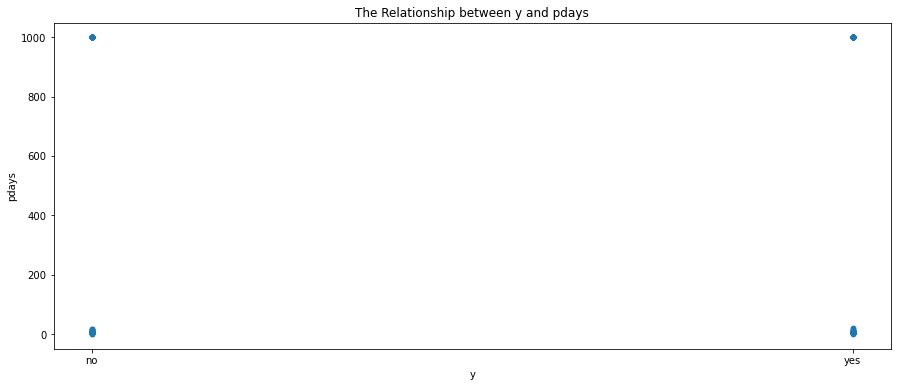

In [66]:
sebar= data.plot.scatter('y','pdays',figsize = (15,6))

plt.title('The Relationship between y and pdays')
plt.show()

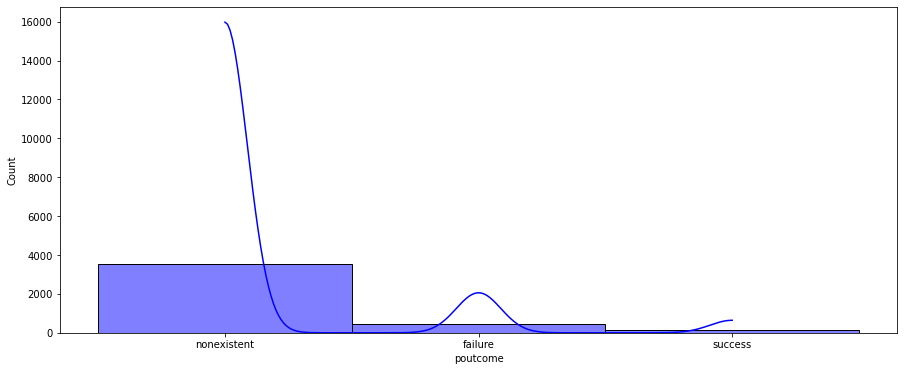

In [67]:
plt.figure(figsize = (15, 6))
sns.histplot(x = data['poutcome'], color = "blue", edgecolor = "black", kde=True)
plt.show()

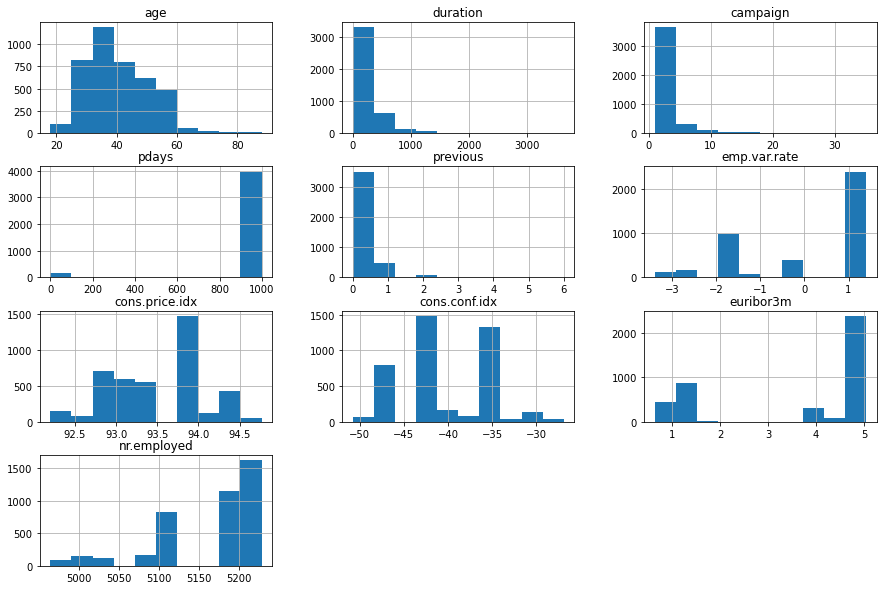

In [68]:
data.iloc[:, :-1].hist(figsize=(15, 10))
plt.show()

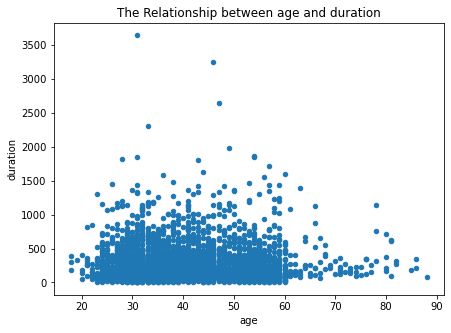

In [69]:
sebaran= data.plot.scatter('age','duration',figsize = (7,5))

plt.title('The Relationship between age and duration')
plt.show()

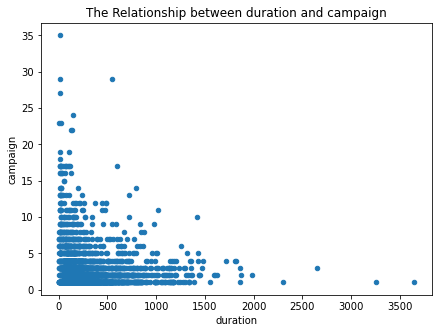

In [70]:
sebaran1= data.plot.scatter('duration','campaign',figsize = (7,5))
plt.title('The Relationship between duration and campaign')
plt.show()

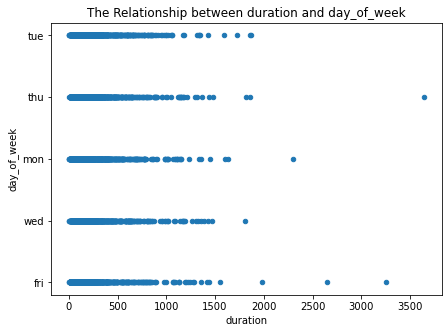

In [71]:
sebaran2= data.plot.scatter('duration','day_of_week',figsize = (7,5))
plt.title('The Relationship between duration and day_of_week')
plt.show()

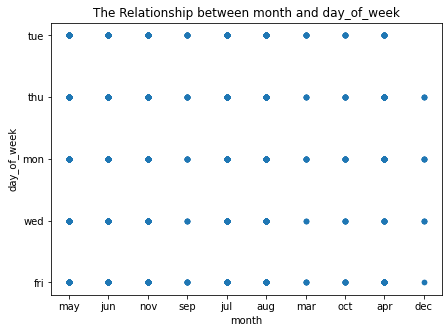

In [72]:
sebaran3= data.plot.scatter('month','day_of_week',figsize = (7,5))
plt.title('The Relationship between month and day_of_week')
plt.show()

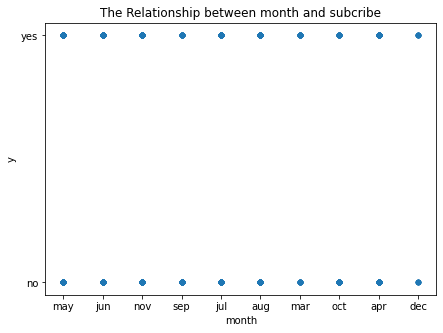

In [73]:
sebaran4= data.plot.scatter('month','y',figsize = (7,5))
plt.title('The Relationship between month and subcribe')
plt.show()

In [74]:
hasil_bulan = data.groupby(['month', 'pdays'], as_index = False)['y'].count()
hasil_bulan

,month,pdays,y
0,apr,2,2
1,apr,6,3
2,apr,7,1
3,apr,10,1
4,apr,999,208
...,...,...,...
69,sep,9,1
70,sep,15,1
71,sep,17,1
72,sep,18,1


In [75]:
yess = data.groupby(['loan', 'month'], as_index = False)['y'].count()
yess.sort_values(by='month', ascending = True)

,loan,month,y
0,no,apr,171
10,unknown,apr,5
19,yes,apr,39
1,no,aug,516
20,yes,aug,103
11,unknown,aug,17
2,no,dec,16
21,yes,dec,6
3,no,jul,567
22,yes,jul,126


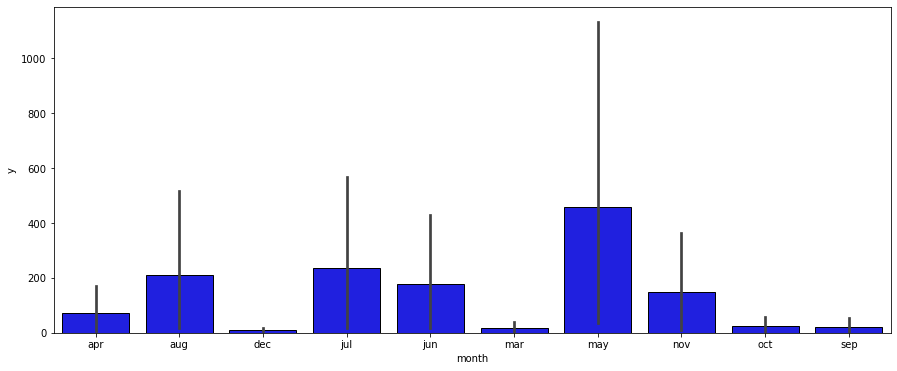

In [76]:
plt.figure(figsize = (15, 6))
sns.barplot(x = yess['month'], y =yess['y'], color = "blue", edgecolor = "black")
plt.show()

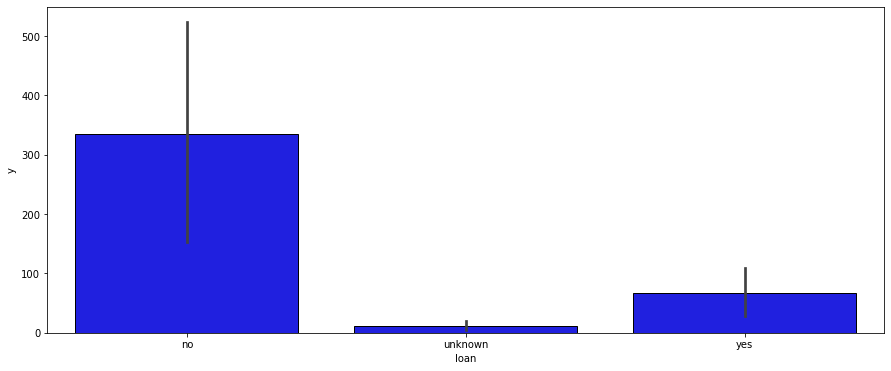

In [77]:
plt.figure(figsize = (15, 6))
sns.barplot(x = yess['loan'], y =yess['y'], color = "blue", edgecolor = "black")
plt.show()

In [78]:
cek = data.groupby(by='y').count()
cek

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,minute
y,,,,,,,,,,,,,,,,,,,,,
no,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,...,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668
yes,451,451,451,451,451,451,451,451,451,451,...,451,451,451,451,451,451,451,451,451,451


In [79]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,minute
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,8.12
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,5.77
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,3.78
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0.28
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0.88
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,3.65
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,1.07
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,8.80


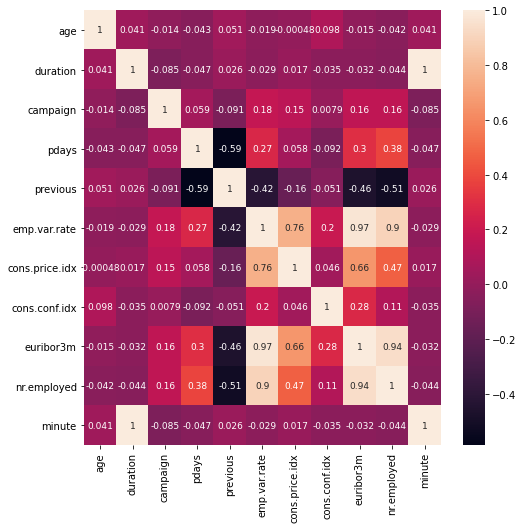

In [80]:
korelasi = data.corr(method = "pearson")
sns.heatmap(korelasi, 
xticklabels = korelasi.columns.values, yticklabels = korelasi.columns.values, annot = True, annot_kws = {"size":9})
heat_map = plt.gcf()
heat_map.set_size_inches(8,8)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

### Data Preprocessing 

In [81]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,minute
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,8.12
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,5.77
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,3.78
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0.28
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0.88
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,3.65
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,1.07
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,8.80


In [82]:
usia = []
for i in data['age']: 
    if i >= 0 and i <= 17:
        usia.append('anak dibawah umur')
    if i >= 18 and i <= 65: 
        usia.append('pemuda')
    if i >= 66 and i <= 79: 
        usia.append('paruh baya')
    if i >= 80 and i <= 99:
        usia.append('orang tua')
    if i >= 100:
        usia.append('lansia')
else:
    False

len(usia)

4119

In [83]:
data['usia'] = usia

In [84]:
data = pd.concat([data, pd.get_dummies(data['contact'])], axis = 1, sort = False)
data.drop(['contact'], axis = 1, inplace = True)
data 

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,minute,usia,cellular,telephone
0,30,blue-collar,married,basic.9y,no,yes,no,may,fri,487,...,-1.8,92.893,-46.2,1.313,5099.1,no,8.12,pemuda,1,0
1,39,services,single,high.school,no,no,no,may,fri,346,...,1.1,93.994,-36.4,4.855,5191.0,no,5.77,pemuda,0,1
2,25,services,married,high.school,no,yes,no,jun,wed,227,...,1.4,94.465,-41.8,4.962,5228.1,no,3.78,pemuda,0,1
3,38,services,married,basic.9y,no,unknown,unknown,jun,fri,17,...,1.4,94.465,-41.8,4.959,5228.1,no,0.28,pemuda,0,1
4,47,admin.,married,university.degree,no,yes,no,nov,mon,58,...,-0.1,93.200,-42.0,4.191,5195.8,no,0.97,pemuda,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,jul,thu,53,...,1.4,93.918,-42.7,4.958,5228.1,no,0.88,pemuda,1,0
4115,39,admin.,married,high.school,no,yes,no,jul,fri,219,...,1.4,93.918,-42.7,4.959,5228.1,no,3.65,pemuda,0,1
4116,27,student,single,high.school,no,no,no,may,mon,64,...,-1.8,92.893,-46.2,1.354,5099.1,no,1.07,pemuda,1,0
4117,58,admin.,married,high.school,no,no,no,aug,fri,528,...,1.4,93.444,-36.1,4.966,5228.1,no,8.80,pemuda,1,0


In [85]:
data.month.replace({'jan': 1,
                    'feb': 2, 
                    'mar': 3, 
                    'apr': 4,
                    'may': 5,
                    'jun': 6,
                    'jul': 7,
                    'aug': 8,
                    'sep': 9,
                    'oct': 10,
                    'nov': 11,
                    'dec': 12}, 
                    inplace = True )

data.marital.replace({'single': 0,
                      'married': 1,
                      'divorced': 2, 
                      'unknown': 3},
                      inplace = True)

data.education.replace({'basic.4y': 1,
                        'basic.6y': 2,
                        'basic.9y': 3,
                        'high.school':4,
                        'university.degree': 5,
                        'professional.course': 6,
                        'illiterate': 7,
                        'unknown': 8},
                        inplace = True)
data.job.replace({'admin.': 1,
                  'blue-collar': 2,
                  'entrepreneur': 3,
                  'housemaid': 4,
                  'management': 5,
                  'retired': 6,
                  'self-employed': 7,
                  'services': 8,
                  'student': 9,
                  'technician': 10,
                  'unemployed': 11,
                  'unknown': 12},
                  inplace = True)
data.default.replace({'no': 0,
                      'yes': 1,
                      'unknown' : 3},
                        inplace = True)
data.housing.replace({'no': 0,
                      'yes': 1, 
                      'unknown' : 2},
                        inplace = True)
data.loan.replace({'no' : 0,
                    'yes' : 1, 
                    'unknown' : 2}, 
                    inplace = True)
data.day_of_week.replace({'mon' : 1,
                           'tue' : 2,
                           'wed' : 3,
                           'thu' : 4,
                           'fri' : 5}, 
                            inplace = True)
data.poutcome.replace({'failure' : 0,
                        'success' : 1,
                        'nonexistent' : 2}, 
                         inplace = True)
data.loan.replace({'no' : 0,
                    'yes' :1, 
                    'unknown' : 2}, 
                    inplace = True)
data.usia.replace({'anak dibawah umur' : 1,
                     'pemuda' : 2, 
                     'paruh baya' : 3,
                     'orang tua' : 4,
                     'lansia' : 5}, 
                      inplace = True)
data.y.replace({'no': 0,
                'yes': 1}, 
                inplace = True)
data.drop(['age'], axis = 1, inplace = True)
data.drop(['duration'], axis = 1, inplace = True)
data

,job,marital,education,default,housing,loan,month,day_of_week,campaign,pdays,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,minute,usia,cellular,telephone
0,2,1,3,0,1,0,5,5,2,999,...,-1.8,92.893,-46.2,1.313,5099.1,0,8.12,2,1,0
1,8,0,4,0,0,0,5,5,4,999,...,1.1,93.994,-36.4,4.855,5191.0,0,5.77,2,0,1
2,8,1,4,0,1,0,6,3,1,999,...,1.4,94.465,-41.8,4.962,5228.1,0,3.78,2,0,1
3,8,1,3,0,2,2,6,5,3,999,...,1.4,94.465,-41.8,4.959,5228.1,0,0.28,2,0,1
4,1,1,5,0,1,0,11,1,1,999,...,-0.1,93.200,-42.0,4.191,5195.8,0,0.97,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,1,1,2,0,1,1,7,4,1,999,...,1.4,93.918,-42.7,4.958,5228.1,0,0.88,2,1,0
4115,1,1,4,0,1,0,7,5,1,999,...,1.4,93.918,-42.7,4.959,5228.1,0,3.65,2,0,1
4116,9,0,4,0,0,0,5,1,2,999,...,-1.8,92.893,-46.2,1.354,5099.1,0,1.07,2,1,0
4117,1,1,4,0,0,0,8,5,1,999,...,1.4,93.444,-36.1,4.966,5228.1,0,8.80,2,1,0


In [86]:
data.head()

,job,marital,education,default,housing,loan,month,day_of_week,campaign,pdays,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,minute,usia,cellular,telephone
0,2,1,3,0,1,0,5,5,2,999,...,-1.8,92.893,-46.2,1.313,5099.1,0,8.12,2,1,0
1,8,0,4,0,0,0,5,5,4,999,...,1.1,93.994,-36.4,4.855,5191.0,0,5.77,2,0,1
2,8,1,4,0,1,0,6,3,1,999,...,1.4,94.465,-41.8,4.962,5228.1,0,3.78,2,0,1
3,8,1,3,0,2,2,6,5,3,999,...,1.4,94.465,-41.8,4.959,5228.1,0,0.28,2,0,1
4,1,1,5,0,1,0,11,1,1,999,...,-0.1,93.200,-42.0,4.191,5195.8,0,0.97,2,1,0


Metode Synthetic Minority Over-sampling Technique (SMOTE) merupakan metode yang populer diterapkan dalam rangka menangani ketidak seimbangan kelas. Teknik ini mensintesis sampel baru dari kelas minoritas untuk menyeimbangkan dataset dengan cara sampling ulang sampel kelas minoritas.

Training set adalah bagian dataset yang kita latih untuk membuat prediksi atau menjalankan fungsi dari sebuah algoritma ML. Kita memberikan petunjuk melalui algoritma agar mesin yang kita latih bisa mencari korelasinya sendiri atau belajar pola dari data yang diberikan.

Test set adalah bagian dataset yang kita tes untuk melihat keakuratannya, atau dengan kata lain melihat performanya.



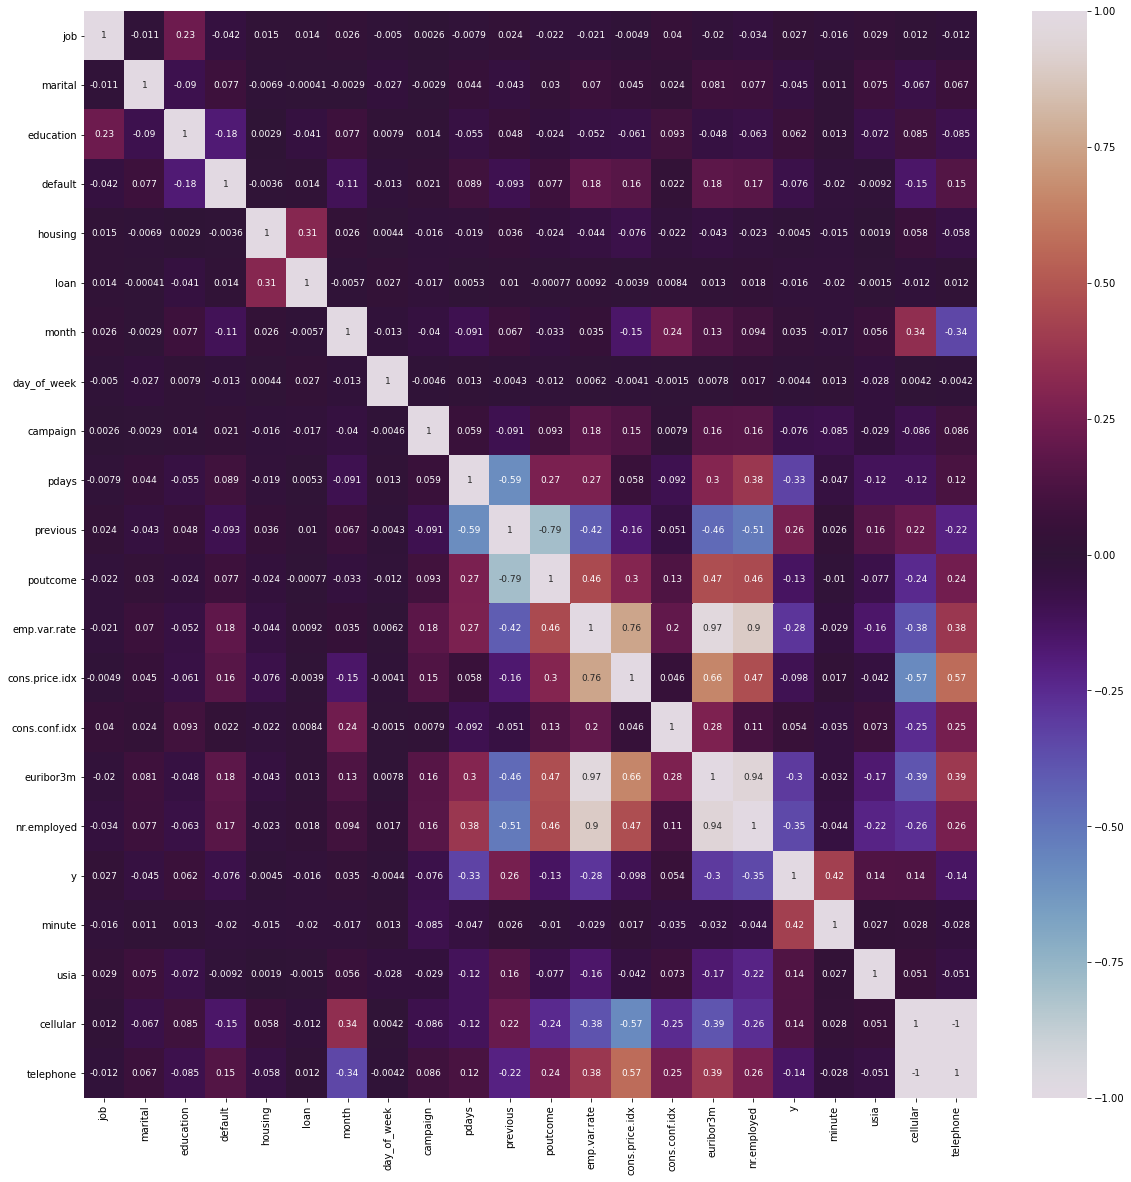

In [117]:
data_corr = data.corr(method = "pearson")
sns.heatmap(data_corr, 
xticklabels = data_corr.columns.values, yticklabels = data_corr.columns.values, 
            annot = True, annot_kws = {"size":9}, 
            cmap = 'twilight')
heat_map = plt.gcf()
heat_map.set_size_inches(20,20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.savefig("awalkorelasi.png")

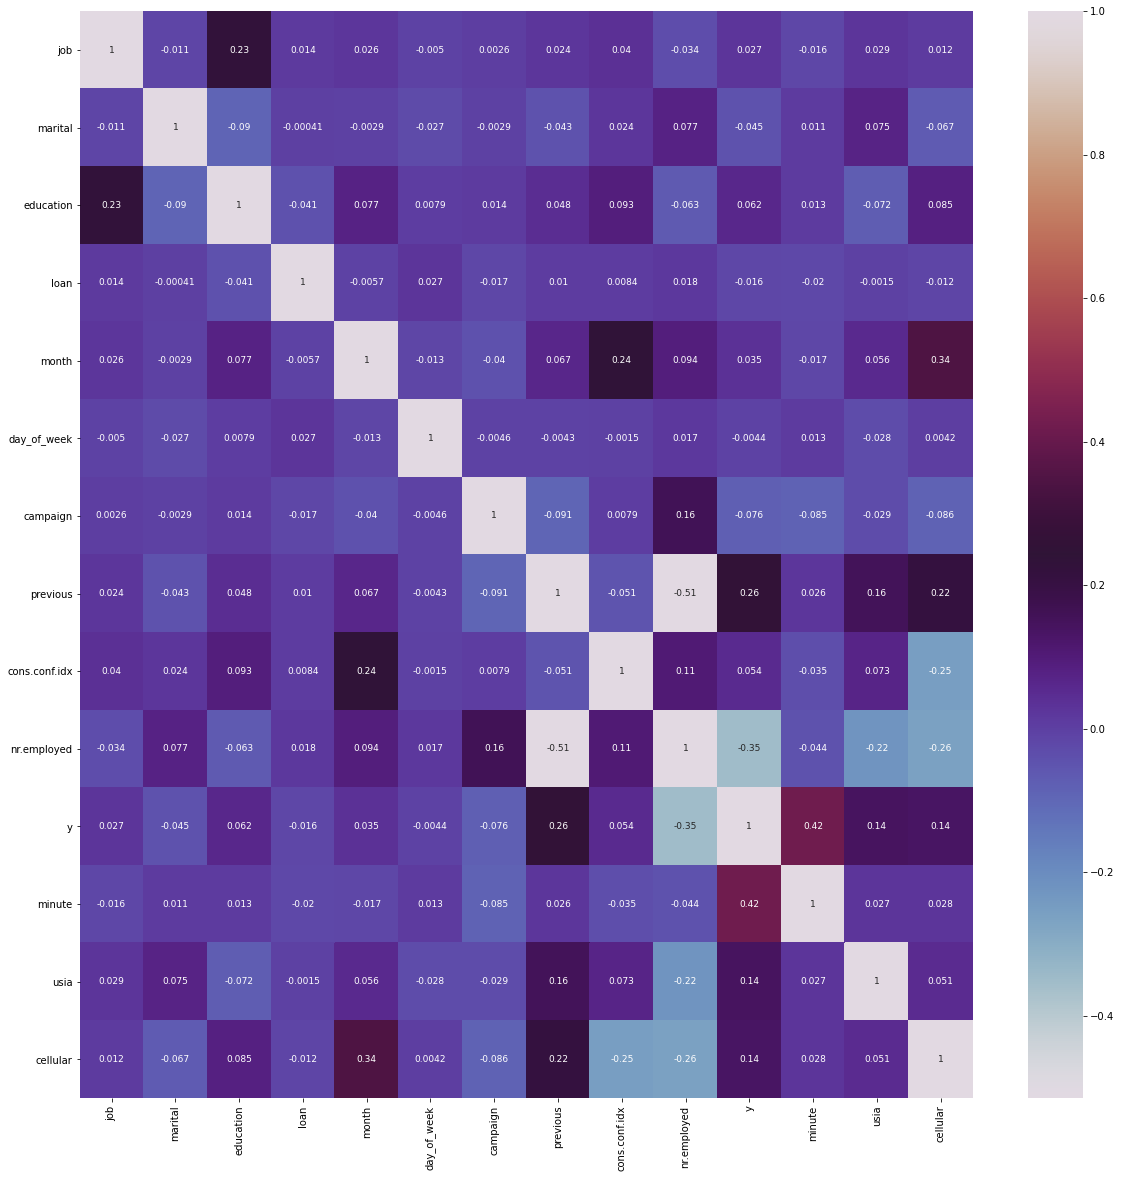

In [116]:
d_drop = data.drop(["euribor3m", "emp.var.rate", "cons.price.idx", "pdays", "poutcome", 
                    "default", "telephone", "housing"],
                   axis = 1, inplace=False)
d_corr = d_drop.corr(method = "pearson")
sns.heatmap(d_corr, 
xticklabels = d_corr.columns.values, yticklabels = d_corr.columns.values, 
            annot = True, annot_kws = {"size":9}, 
            cmap = 'twilight')
heat_map = plt.gcf()
heat_map.set_size_inches(20,20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.savefig("newcorr.png")

### Split the Data

In [89]:
#Define the predictor and dependen variabel
X = data[["cellular", "usia", "minute", "nr.employed", "previous"]]
y = data["y"]

In [90]:
#train test split data
test_size = 0.2
seed = 125  
X_train, X_test, y_train, y_test = ms.train_test_split(X,y, test_size = test_size,
                                                       random_state = seed, stratify = y)
print('Proportional class distribution in train data:\n', y_train.value_counts(),'\n')
print('Proportional class distribution in test data:\n', y_test.value_counts())

Proportional class distribution in train data:
 0    2934
1     361
Name: y, dtype: int64 

Proportional class distribution in test data:
 0    734
1     90
Name: y, dtype: int64


In [91]:
#feature scaling
scaler = StandardScaler()
scaler_train = scaler.fit_transform(X_train)
scaler_test = scaler.transform(X_test)


In [92]:
#Handling for imbalanced Class
over_sampler = SMOTE(sampling_strategy="minority", random_state = 125, k_neighbors = 13)
X_smote, y_smote = over_sampler.fit_resample(X_train, y_train)
X_smote, y_smote

(      cellular  usia     minute  nr.employed  previous
 0            1     2   6.720000  5008.700000         2
 1            1     2   1.530000  5099.100000         1
 2            1     2   0.400000  5195.800000         0
 3            0     2   4.370000  5191.000000         0
 4            0     2   0.320000  5191.000000         0
 ...        ...   ...        ...          ...       ...
 5863         1     2   5.604977  5020.199542         0
 5864         1     2   4.281981  4991.600000         0
 5865         0     2  18.862279  5191.654505         0
 5866         1     2   2.332772  5076.200000         0
 5867         1     2   4.147409  5076.200000         0
 
 [5868 rows x 5 columns],
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 5863    1
 5864    1
 5865    1
 5866    1
 5867    1
 Name: y, Length: 5868, dtype: int64)

### Develop Model 
1. Random Forest Classifier

In [93]:
#Define Model Random Forest Classifier

model = ens.RandomForestClassifier (n_estimators = 200,
                                   random_state = 125)
print(model.fit(X_smote, y_smote))

#Predict the score 
y_prediksi = model.predict (X_test)
print (y_prediksi)
score = met.accuracy_score(y_test, y_prediksi)
print ("accuracy=", score)
precision = met.precision_score(y_test, y_prediksi)
print ("precision=", precision)
recall = met.recall_score(y_test, y_prediksi)
print ("recall=", recall)
auc = met.roc_auc_score(y_test, y_prediksi)
print ("AUC=", auc)


# Print classification report
print(classification_report(y_test, y_prediksi))

Fbeta = ((1 + 2^2) * precision * recall) / ((2^2) * precision + recall)
print ("Nilai Fbeta Score: ", Fbeta)

RandomForestClassifier(n_estimators=200, random_state=125)
[0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 

In [94]:
#Checking confusion matrix
confusion = met.confusion_matrix(y_test, y_prediksi)
confusion 

array([[630, 104],
       [ 20,  70]], dtype=int64)

<AxesSubplot:>

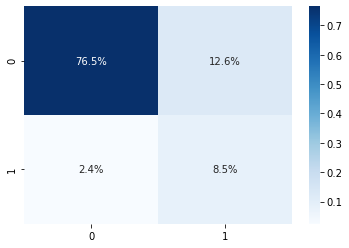

In [95]:
import numpy as np
sns.heatmap(confusion/np.sum(confusion), annot=True, 
            fmt='.1%', cmap='Blues')

In [96]:
#Error rate

TP = 630
FP = 104
FN = 20
TN = 70
    
ERR = (FP + FN) / (TP + FP + TN + FN)
ERR


0.15048543689320387

2. XGBoost Classifier

In [97]:
#Define model using XGBoost Classifier

classifier = XGBClassifier(use_label_encoder=False, disable_default_eval_metric=1)

#Train the model
xgb_model = classifier.fit(X_smote, y_smote)
print(xgb_model)

#checking the score
y_prediksi = xgb_model.predict(X_test)
print (y_prediksi)
score = met.accuracy_score(y_test, y_prediksi)
print ("accuracy=", score)
precision = met.precision_score(y_test, y_prediksi)
print ("precision=", precision)
recall = met.recall_score(y_test, y_prediksi)
print ("recall=", recall)
auc = met.roc_auc_score(y_test, y_prediksi)
print ("AUC=", auc)

# Print classification report
print(classification_report(y_test, y_prediksi))

Fbeta = ((1 + 2^2) * precision * recall) / ((2^2) * precision + recall)
print ("Nilai Fbeta Score: ", Fbeta)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              disable_default_eval_metric=1, enable_categorical=False, gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
[0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 

In [98]:
#Confusion Matrix
confusion = met.confusion_matrix(y_test, y_prediksi)
confusion 

array([[628, 106],
       [ 13,  77]], dtype=int64)

<AxesSubplot:>

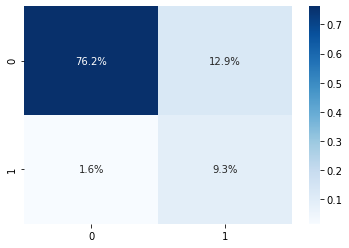

In [99]:
import numpy as np
sns.heatmap(confusion/np.sum(confusion), annot=True, 
            fmt='.1%', cmap='Blues')

In [100]:
#Count the error rate
TP = 628
FP = 106
FN = 13
TN = 77
    
ERR = (FP + FN) / (TP + FP + TN + FN)
ERR


0.14441747572815533

3. Decision Tree Classifier

In [101]:
import sklearn.tree as tree 
import sklearn.metrics as met
model = tree.DecisionTreeClassifier(random_state= 125, max_depth = 5, criterion = "entropy")
print(model.fit(X_smote, y_smote))

#checking the score 
y_prediksi = model.predict(X_test)
print (y_prediksi)
score = met.accuracy_score(y_test, y_prediksi)
print ("accuracy=", score)
precision = met.precision_score(y_test, y_prediksi)
print ("precision=", precision)
recall = met.recall_score(y_test, y_prediksi)
print ("recall=", recall)
auc = met.roc_auc_score(y_test, y_prediksi)
print ("AUC=", auc)


# Print classification report
print(classification_report(y_test, y_prediksi))

Fbeta = ((1 + 2^2) * precision * recall) / ((2^2) * precision + recall)
print ("Nilai Fbeta Score: ", Fbeta)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=125)
[0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 

In [102]:
#see the prediction class
confusion = met.confusion_matrix(y_test, y_prediksi)
confusion 

array([[599, 135],
       [  5,  85]], dtype=int64)

<AxesSubplot:>

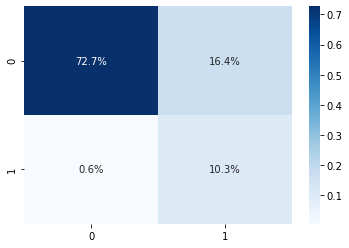

In [103]:
import numpy as np
sns.heatmap(confusion/np.sum(confusion), annot=True, 
            fmt='.1%', cmap='Blues')

In [104]:
#count error rate
TP = 599
FP = 135
FN = 5
TN = 85
    
ERR = (FP + FN) / (TP + FP + TN + FN)
ERR


0.16990291262135923

4. Gradient Boosting

In [105]:
#Train the model
gbt_model = GradientBoostingClassifier(n_estimators = 200, random_state = 125).fit(X_smote, y_smote)
print(gbt_model)


#Checking the score 
y_prediksi = gbt_model.predict(X_test)
print (y_prediksi)
score = met.accuracy_score(y_test, y_prediksi)
print ("accuracy=", score)
precision = met.precision_score(y_test, y_prediksi)
print ("precision=", precision)
recall = met.recall_score(y_test, y_prediksi)
print ("recall=", recall)
auc = met.roc_auc_score(y_test, y_prediksi)
print ("AUC=", auc)


# Print classification report
print(classification_report(y_test, y_prediksi))

Fbeta = ((1 + 2^2) * precision * recall) / ((2^2) * precision + recall)
print ("Nilai Fbeta Score: ", Fbeta)

GradientBoostingClassifier(n_estimators=200, random_state=125)
[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 

In [106]:
#See Prediction
confusion = met.confusion_matrix(y_test, y_prediksi)
confusion 

array([[635,  99],
       [ 11,  79]], dtype=int64)

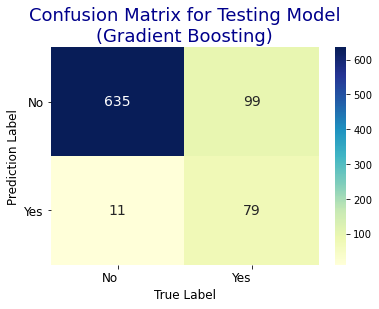

In [107]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion), ('No', 'Yes'), ('No', 'Yes'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('Prediction Label', fontsize=12)
plt.xlabel('True Label', fontsize=12)
plt.show()

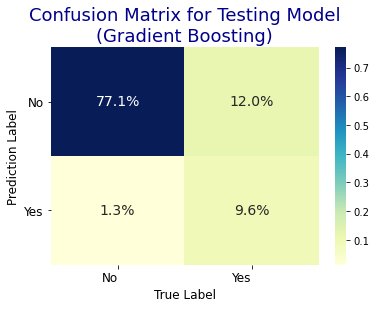

In [108]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion), ('No', 'Yes'), ('No', 'Yes'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df/np.sum(confusion), annot=True, annot_kws={'size': 14}, fmt='.1%', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('Prediction Label', fontsize=12)
plt.xlabel('True Label', fontsize=12)
plt.show()

In [109]:
#count error rate
TP = 635
FP = 99
FN = 11
TN = 79
    
ERR = (FP + FN) / (TP + FP + TN + FN)
ERR


0.13349514563106796

In [110]:
# find the feature the most impact to the model
selector = RFE(estimator = gbt_model, n_features_to_select=3, step=1)
selector = selector.fit(X, y)
print(X.columns)
print(selector.support_)
print(selector.ranking_)

Index(['cellular', 'usia', 'minute', 'nr.employed', 'previous'], dtype='object')
[False False  True  True  True]
[2 3 1 1 1]


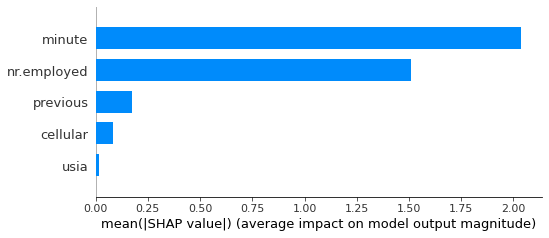

In [111]:
import shap
shap_values = shap.TreeExplainer(gbt_model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

5. Logistic Regression 

In [112]:
#train model
model3 = lm.LogisticRegression(solver = 'lbfgs', random_state = 125)
print (model3.fit(X_smote, y_smote))


#Checking the score 
y_prediksi = model3.predict(X_test)
print (y_prediksi)
score = met.accuracy_score(y_test, y_prediksi)
print ("accuracy=", score)
precision = met.precision_score(y_test, y_prediksi)
print ("precision=", precision)
recall = met.recall_score(y_test, y_prediksi)
print ("recall=", recall)
auc = met.roc_auc_score(y_test, y_prediksi)
print ("AUC=", auc)


# Print classification report
print(classification_report(y_test, y_prediksi))

Fbeta = ((1 + 2^2) * precision * recall) / ((2^2) * precision + recall)
print ("Nilai Fbeta Score: ", Fbeta)

LogisticRegression(random_state=125)
[0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 

In [113]:
#see of class prediction
confusion = met.confusion_matrix(y_test, y_prediksi)
confusion 

array([[600, 134],
       [ 23,  67]], dtype=int64)

<AxesSubplot:>

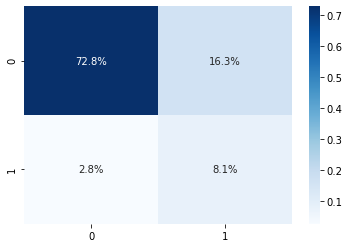

In [114]:
import numpy as np
sns.heatmap(confusion/np.sum(confusion), annot=True, 
            fmt='.1%', cmap='Blues')

In [115]:
#Count the error rate
TP = 600
FP = 134
FN = 23
TN = 67
    
ERR = (FP + FN) / (TP + FP + TN + FN)
ERR


0.19053398058252427

### FINISH

* The best model for this classification is Gradient Boosting Classifier with the evaluation matrix are high recall and low precision.

* Assumption that more attention to customers on False Positive rate for getting the result about their subscribe and no subscribe.

* Score Recall is low because that prediction is true for class positif but the class negative are assumed to class positive.
